In [1]:
#library(dplyr)
library(tidyverse)
set.seed(7)

Warning message:
“package ‘dplyr’ was built under R version 4.3.2”
Warning message:
“package ‘stringr’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
media_views <- read_csv("data/media_views-2.csv")
checkpoint_df <- read_csv("data/checkpoints-2.csv") |>
    select(-institution_id, -class_id)

Rows: 6149 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): book, release, chapter, page, institution_id, class_id, student_id
dbl  (6): chapter_number, section_number, media_id, access_count, proportion...
lgl  (1): review_flag
dttm (2): dt_started, dt_last_event

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 79092 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): book, release, institution_id, class_id, student_id, construct
dbl (6): response, chapter_number, EOC, n_possible, n_correct, n_attempt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
joined_df <- inner_join(media_views, checkpoint_df, by = join_by(student_id)) 
#joined_df


Warning message in inner_join(media_views, checkpoint_df, by = join_by(student_id)):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


Warning message:
“Removed 251021 rows containing missing values (`geom_point()`).”


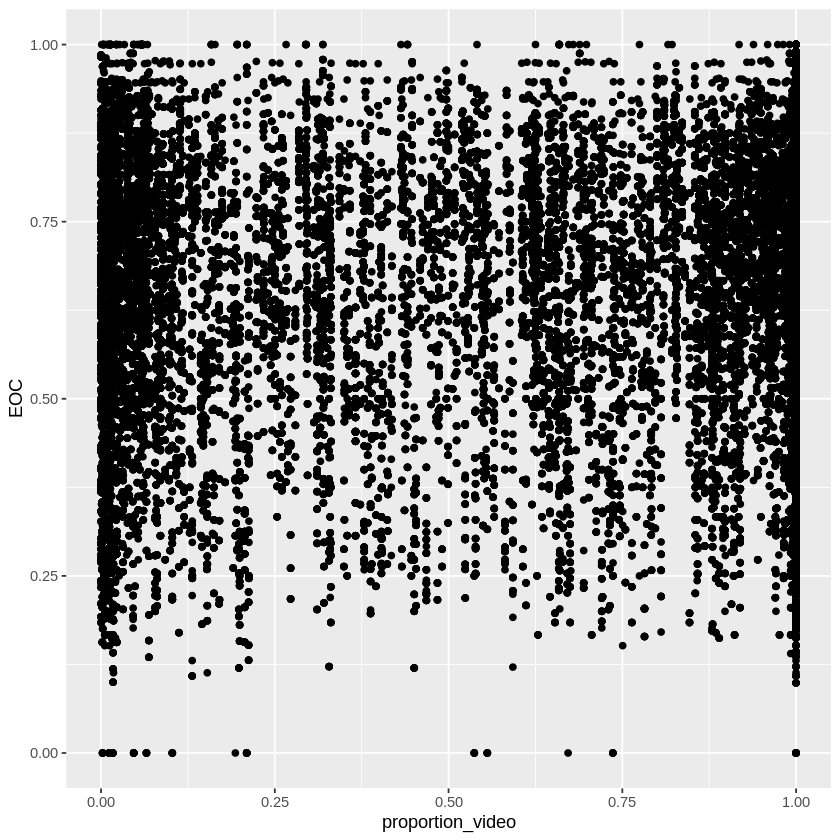

In [4]:
joined_df |>
    ggplot(aes(x = proportion_video, y = EOC)) +
    geom_point()

Warning message:
“Removed 251021 rows containing missing values (`geom_point()`).”


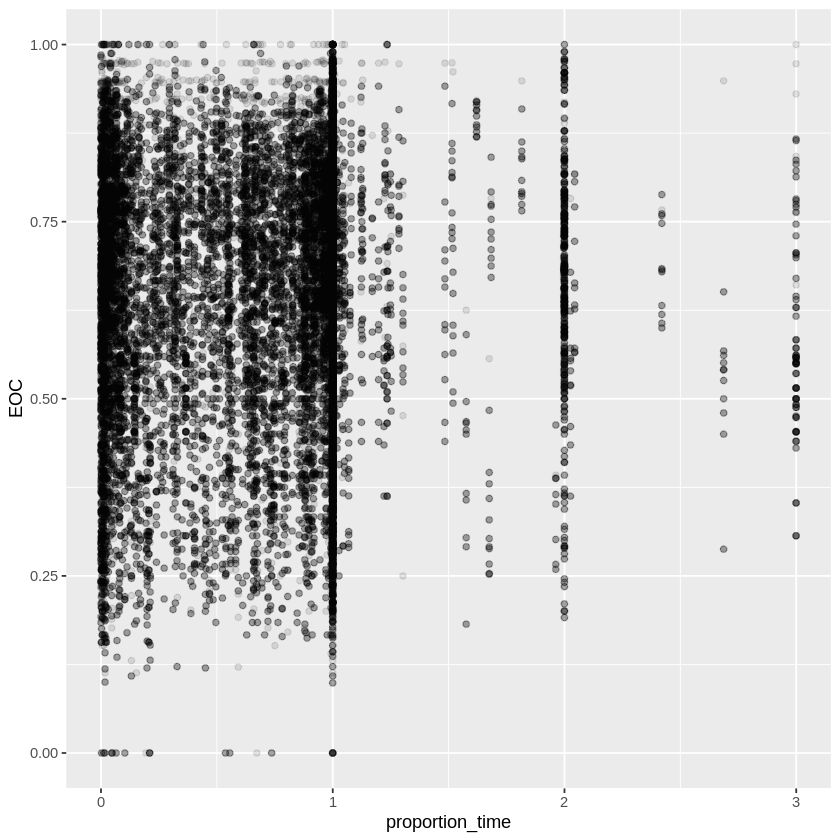

In [5]:
joined_df |>
    ggplot(aes(x = proportion_time, y = EOC)) +
    geom_point(alpha = 0.1) #+
    #alpha(0.4)

Warning message:
“Removed 141 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 122 rows containing non-finite values (`stat_bin()`).”


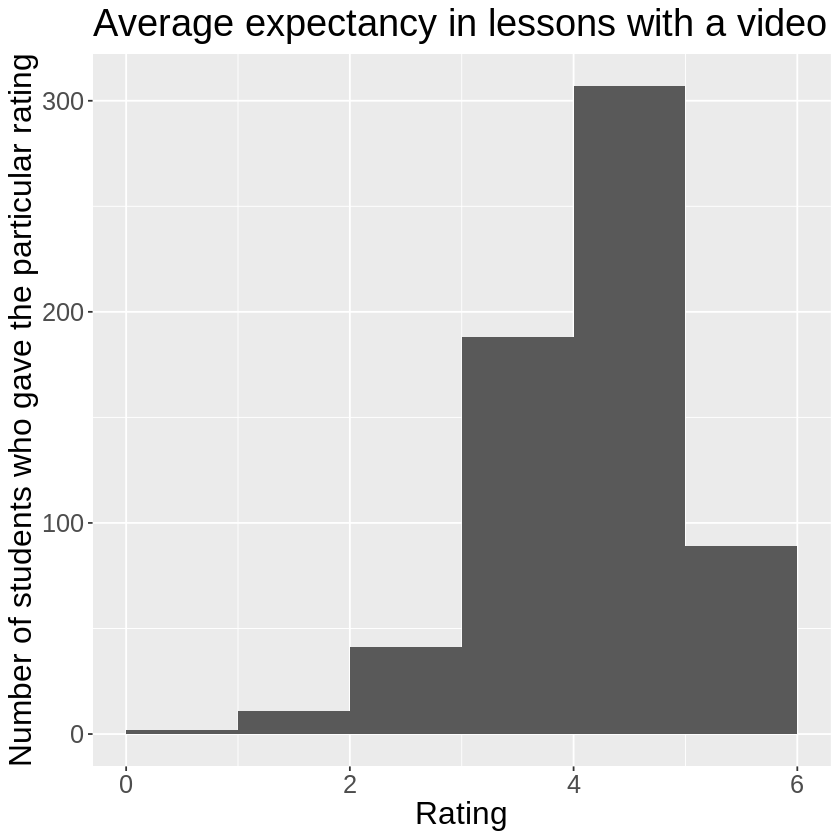

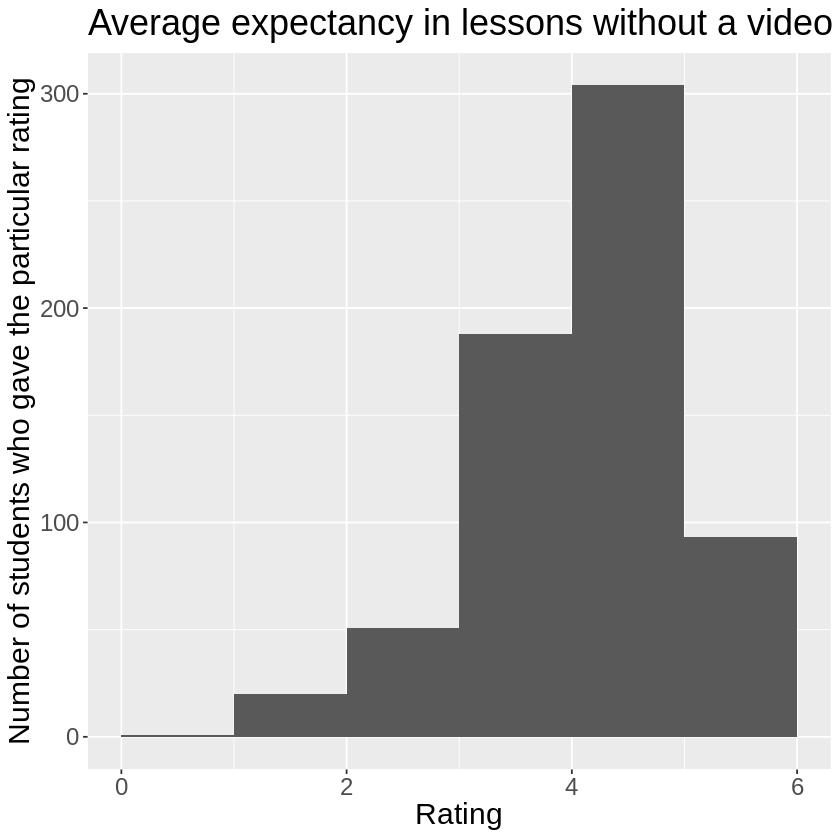

In [11]:
expectancy_with_video <- joined_df |>
    filter(proportion_video != "NA") |>
    select(student_id, construct, response, proportion_video) |>
    filter(construct == "Expectancy") |>
    group_by(student_id) |>
    summarise(average_expectancy = mean(response, na.rm = TRUE))

expectancy_with_video_size <- expectancy_with_video |>
    nrow()

expectancy_without_video <- joined_df |>
    filter(is.na(proportion_video)) |>
    select(student_id, construct, response, proportion_video) |>
    filter(construct == "Expectancy") |>
    group_by(student_id) |>
    summarise(average_expectancy = mean(response, na.rm = TRUE)) |>
    slice_sample(n=expectancy_with_video_size)

histogram_expectancy_with_video <- expectancy_with_video |>
    ggplot(aes(x = average_expectancy)) +
    geom_histogram(breaks = c(0, 1, 2, 3, 4, 5, 6)) +
    ggtitle("Average expectancy in lessons with a video") +
    labs(x = "Rating", y = "Number of students who gave the particular rating") +
    theme(text = element_text(size = 19))

histogram_expectancy_without_video <- expectancy_without_video |>
    ggplot(aes(x = average_expectancy)) +
    geom_histogram(breaks = c(0, 1, 2, 3, 4, 5, 6)) + 
    ggtitle("Average expectancy in lessons without a video") +
    labs(x = "Rating", y = "Number of students who gave the particular rating") +
    theme(text = element_text(size = 18))

histogram_expectancy_with_video
histogram_expectancy_without_video


Warning message:
“Removed 141 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 129 rows containing non-finite values (`stat_bin()`).”


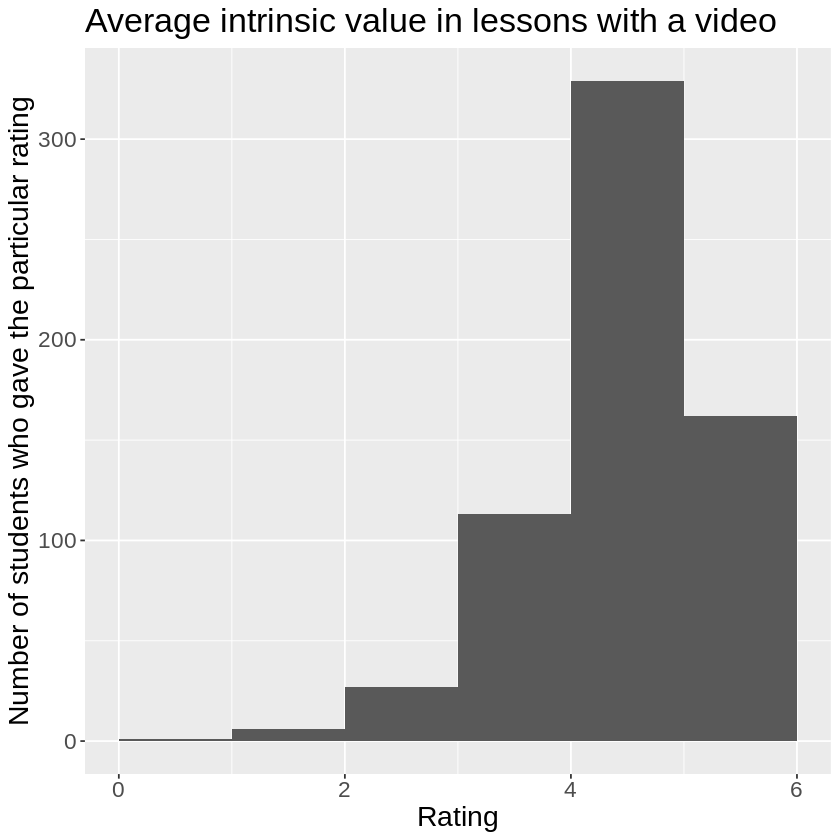

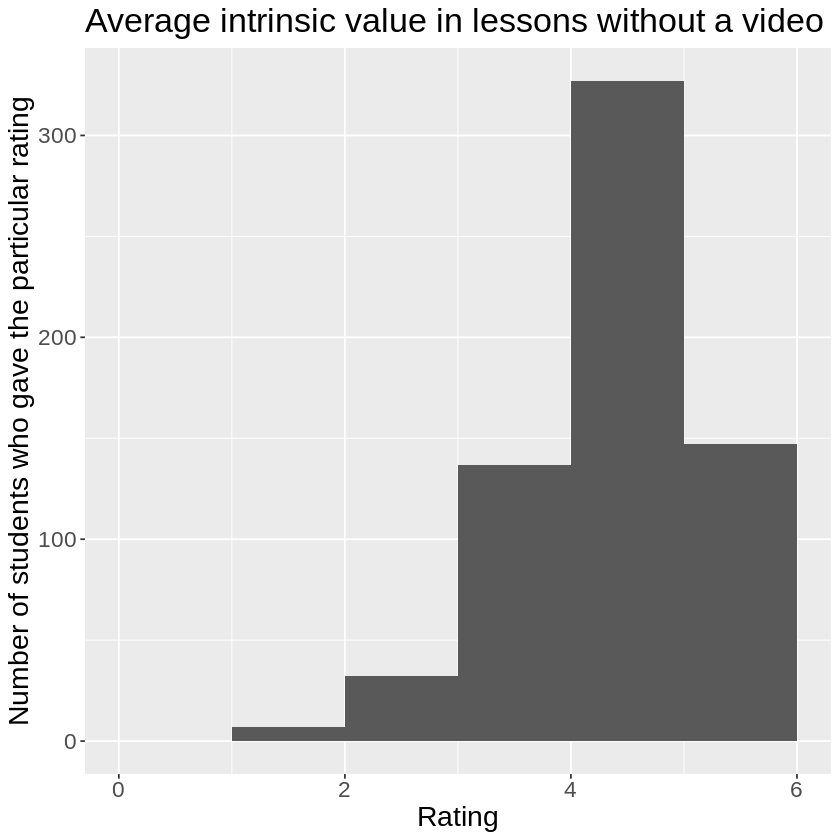

In [13]:
intrinsic_with_video <- joined_df |>
    filter(proportion_video != "NA") |>
    select(student_id, construct, response, proportion_video) |>
    filter(construct == "Intrinsic Value") |>
    group_by(student_id) |>
    summarise(average_intrinsic = mean(response, na.rm = TRUE))

intrinsic_with_video_size <- intrinsic_with_video |>
    nrow()

expectancy_without_video <- joined_df |>
    filter(is.na(proportion_video)) |>
    select(student_id, construct, response, proportion_video) |>
    filter(construct == "Intrinsic Value") |>
    group_by(student_id) |>
    summarise(average_intrinsic = mean(response, na.rm = TRUE)) |>
    slice_sample(n=intrinsic_with_video_size)


histogram_intrinsic_without_video <- expectancy_without_video |>
    ggplot(aes(x = average_intrinsic)) +
    geom_histogram(breaks = c(0, 1, 2, 3, 4, 5, 6)) +
    ggtitle("Average intrinsic value in lessons without a video") +
    labs(x = "Rating", y = "Number of students who gave the particular rating") +
    theme(text = element_text(size = 17))

histogram_intrinsic_with_video <- intrinsic_with_video |>
    ggplot(aes(x = average_intrinsic)) +
    geom_histogram(breaks = c(0, 1, 2, 3, 4, 5, 6)) +
    ggtitle("Average intrinsic value in lessons with a video") +
    labs(x = "Rating", y = "Number of students who gave the particular rating") +
    theme(text = element_text(size = 17))

histogram_intrinsic_with_video
histogram_intrinsic_without_video

Warning message:
“Removed 142 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 138 rows containing non-finite values (`stat_bin()`).”


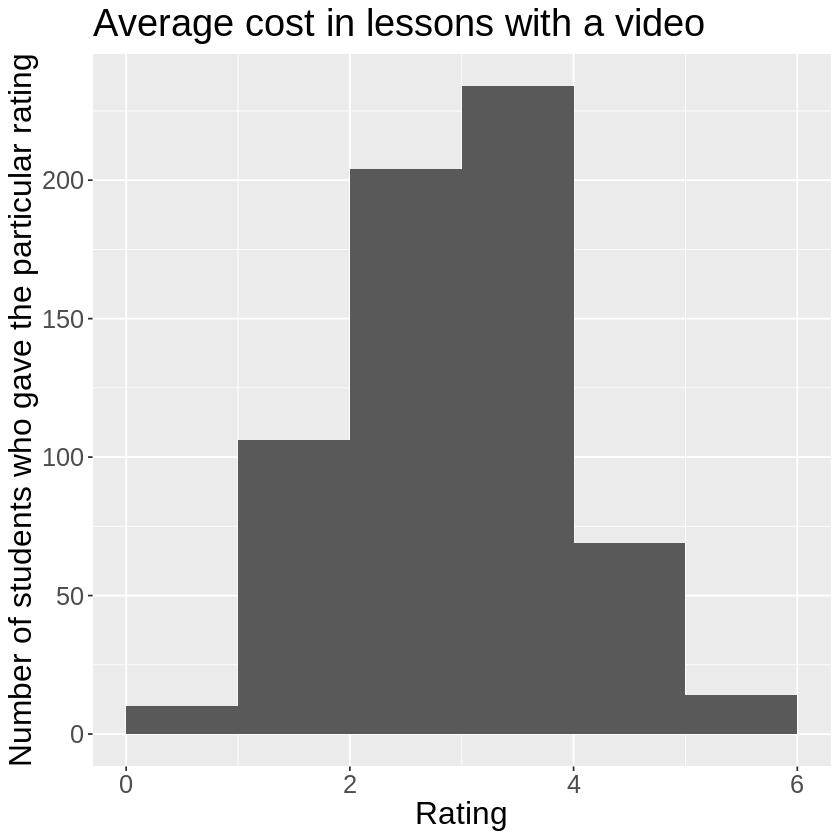

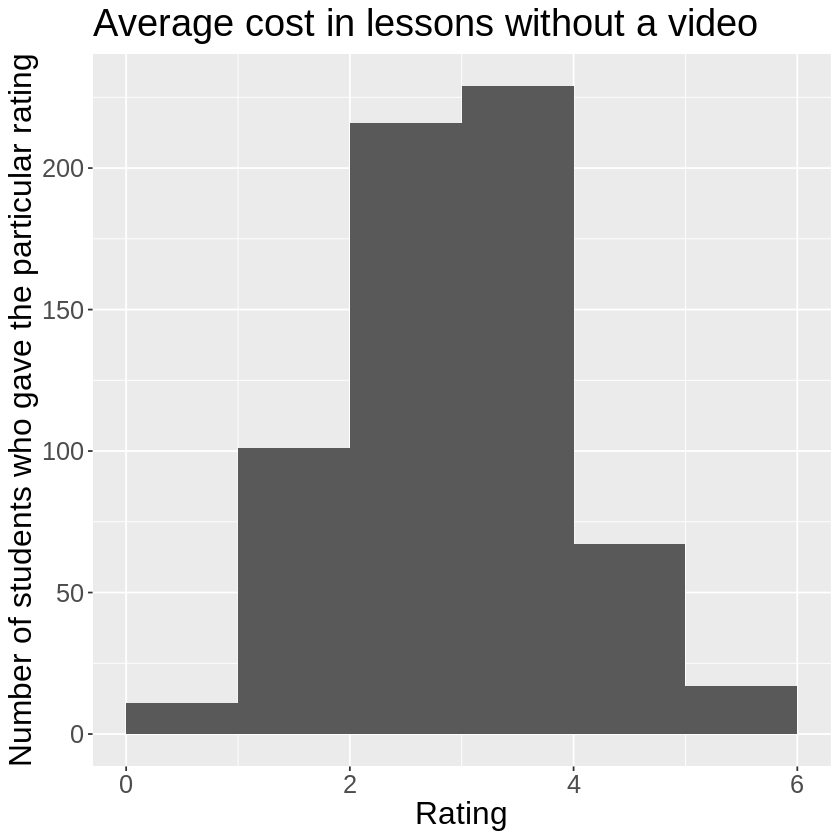

In [8]:
cost_with_video <- joined_df |>
    filter(proportion_video != "NA") |>
    select(student_id, construct, response, proportion_video) |>
    filter(construct == "Cost") |>
    group_by(student_id) |>
    summarise(average_cost = mean(response, na.rm = TRUE))

cost_with_video_size <- cost_with_video |>
    nrow()

expectancy_without_video <- joined_df |>
    filter(is.na(proportion_video)) |>
    select(student_id, construct, response, proportion_video) |>
    filter(construct == "Cost") |>
    group_by(student_id) |>
    summarise(average_cost = mean(response, na.rm = TRUE)) |>
    slice_sample(n=cost_with_video_size)

histogram_cost_without_video <- expectancy_without_video |>
    ggplot(aes(x = average_cost)) +
    geom_histogram(breaks = c(0, 1, 2, 3, 4, 5, 6)) +
    ggtitle("Average cost in lessons without a video") +
    labs(x = "Rating", y = "Number of students who gave the particular rating") +
    theme(text = element_text(size = 19))

histogram_cost_with_video <- cost_with_video |>
    ggplot(aes(x = average_cost)) +
    geom_histogram(breaks = c(0, 1, 2, 3, 4, 5, 6)) +
     ggtitle("Average cost in lessons with a video") +
    labs(x = "Rating", y = "Number of students who gave the particular rating") +
    theme(text = element_text(size = 19))

histogram_cost_with_video
histogram_cost_without_video

Warning message:
“Removed 141 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 109 rows containing non-finite values (`stat_bin()`).”


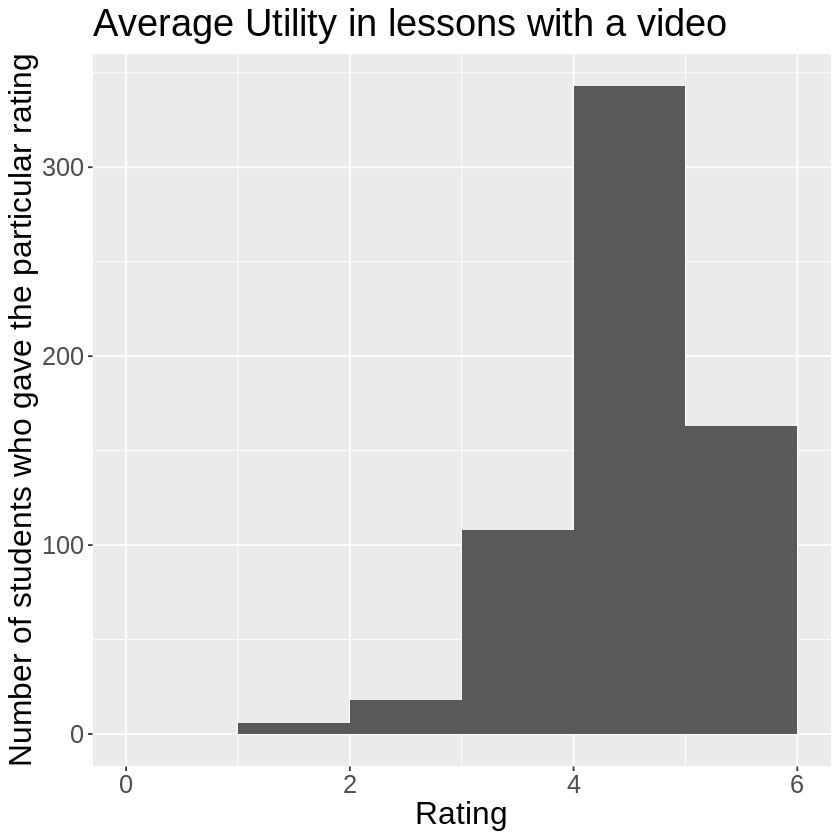

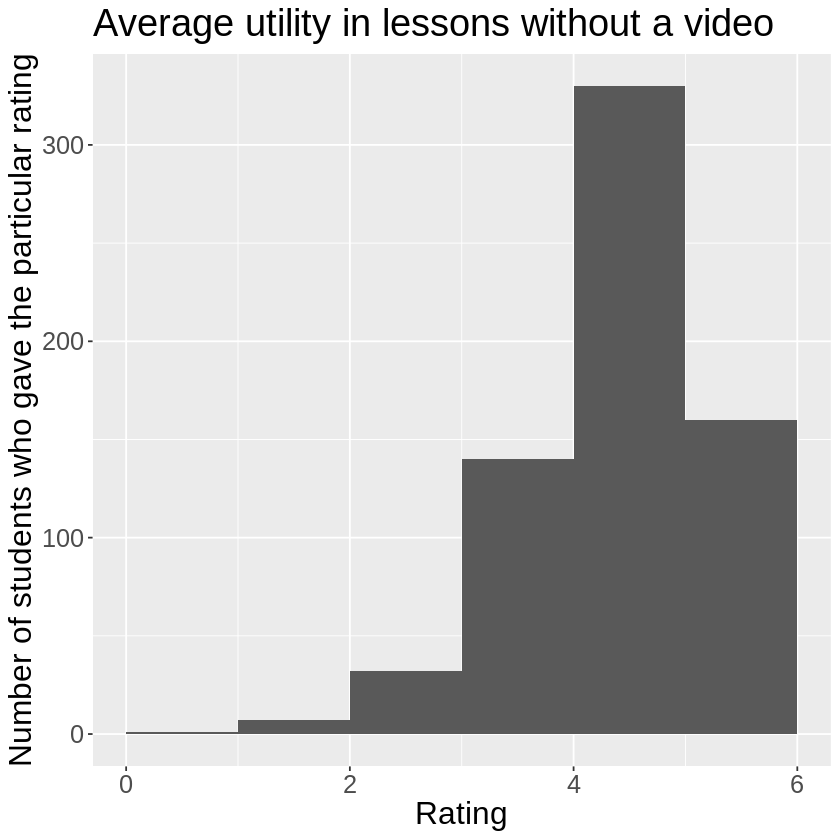

In [9]:
utility_with_video <- joined_df |>
    filter(proportion_video != "NA") |>
    select(student_id, construct, response, proportion_video) |>
    filter(construct == "Utility Value") |>
    group_by(student_id) |>
    summarise(average_utility = mean(response, na.rm = TRUE))

utility_with_video_size <- utility_with_video |>
    nrow()

expectancy_without_video <- joined_df |>
    filter(is.na(proportion_video)) |>
    select(student_id, construct, response, proportion_video) |>
    filter(construct == "Utility Value") |>
    group_by(student_id) |>
    summarise(average_utility = mean(response, na.rm = TRUE)) |>
    slice_sample(n=utility_with_video_size)

histogram_utility_without_video <- expectancy_without_video |>
    ggplot(aes(x = average_utility)) +
    geom_histogram(breaks = c(0, 1, 2, 3, 4, 5, 6)) +
    ggtitle("Average utility in lessons without a video") +
    labs(x = "Rating", y = "Number of students who gave the particular rating") +
    theme(text = element_text(size = 19))

histogram_utility_with_video <- utility_with_video |>
    ggplot(aes(x = average_utility)) +
    geom_histogram(breaks = c(0, 1, 2, 3, 4, 5, 6)) +
     ggtitle("Average Utility in lessons with a video") +
    labs(x = "Rating", y = "Number of students who gave the particular rating") +
    theme(text = element_text(size = 19))

histogram_utility_with_video
histogram_utility_without_video

Warning message:
“Removed 141 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 130 rows containing non-finite values (`stat_bin()`).”


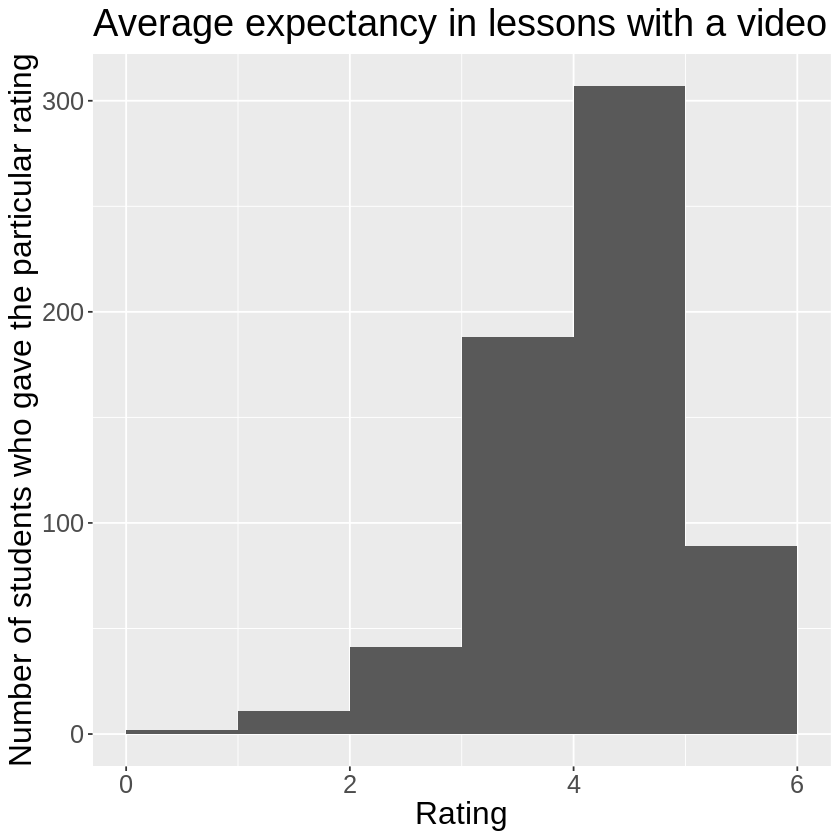

Warning message:
“Removed 141 rows containing non-finite values (`stat_bin()`).”


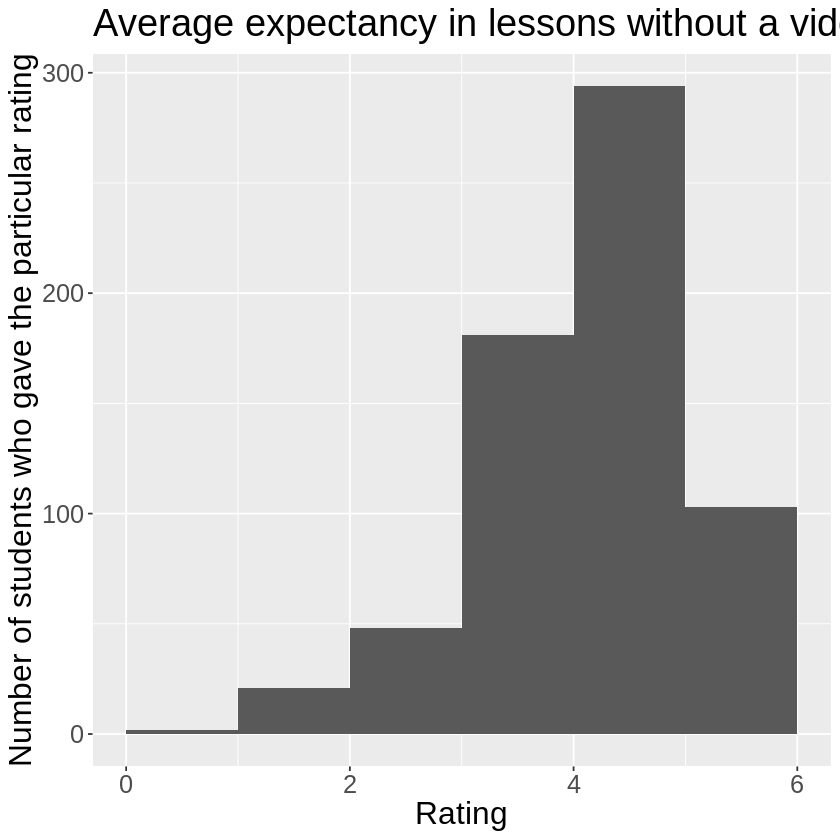

Warning message:
“Removed 130 rows containing non-finite values (`stat_bin()`).”


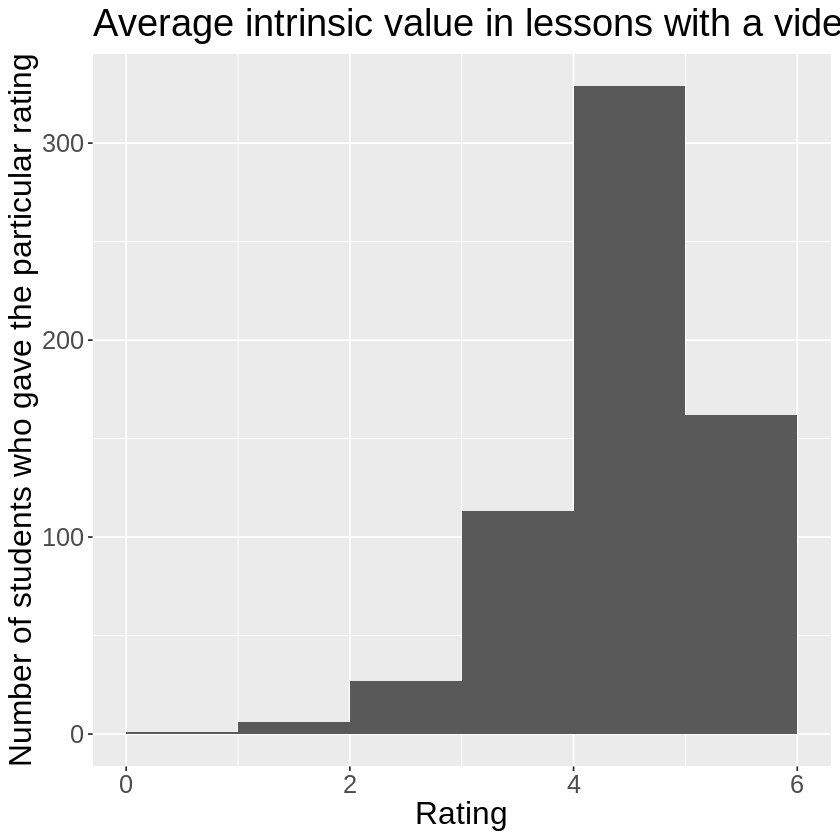

Warning message:
“Removed 142 rows containing non-finite values (`stat_bin()`).”


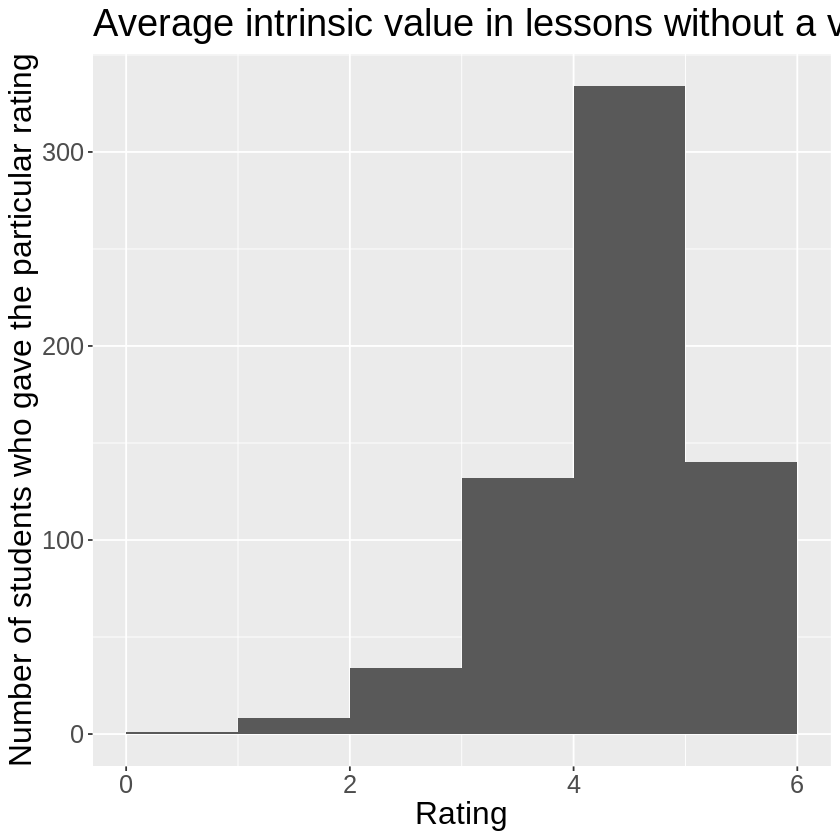

Warning message:
“Removed 138 rows containing non-finite values (`stat_bin()`).”


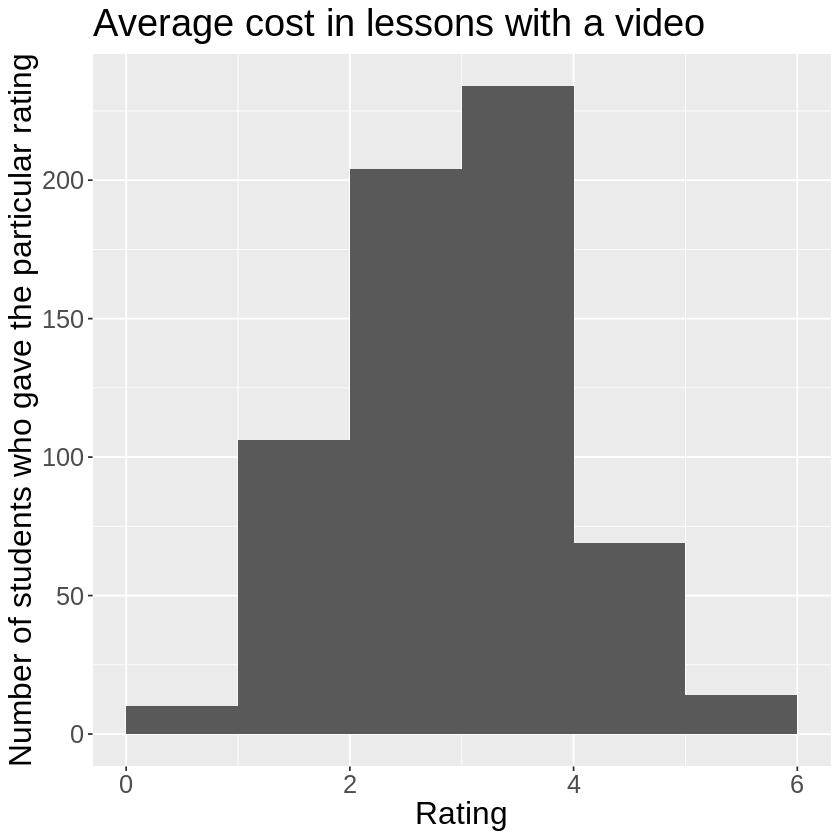

Warning message:
“Removed 141 rows containing non-finite values (`stat_bin()`).”


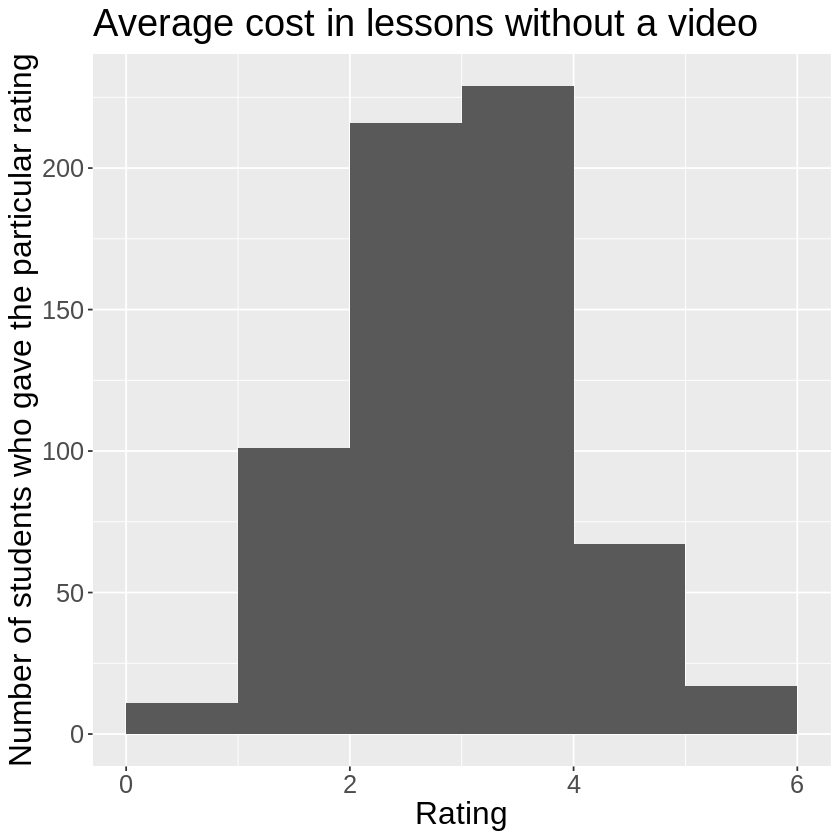

Warning message:
“Removed 109 rows containing non-finite values (`stat_bin()`).”


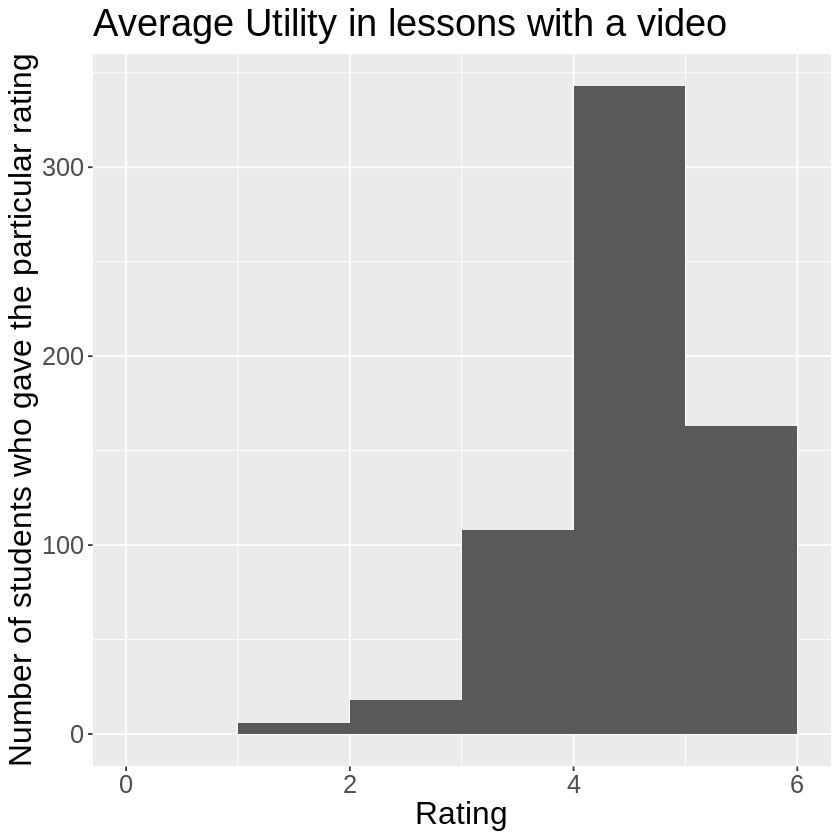

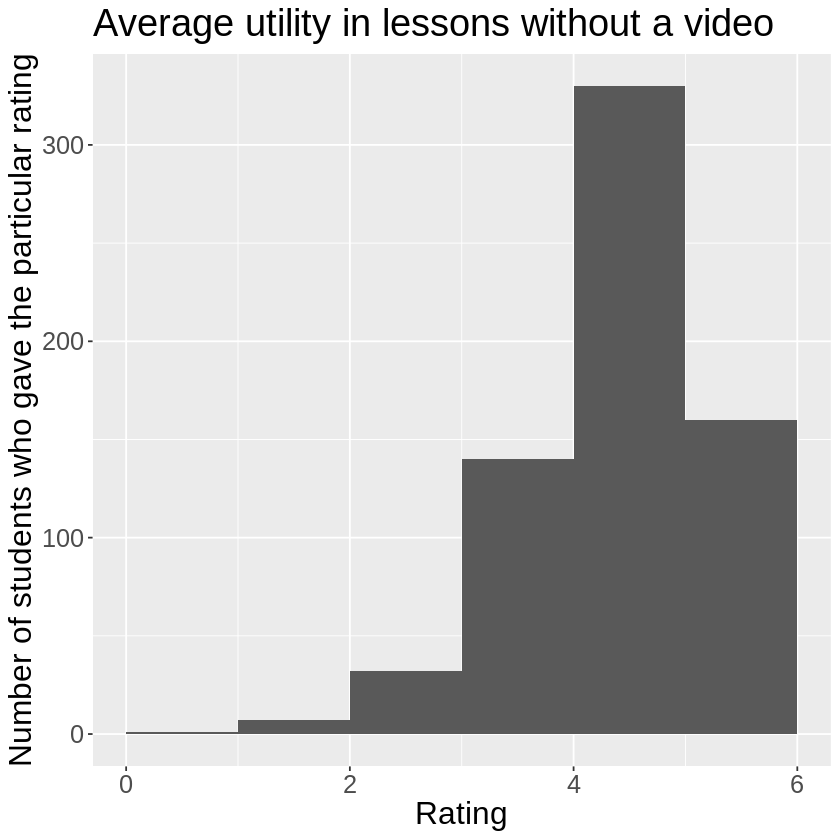

In [10]:
histogram_expectancy_with_video
histogram_expectancy_without_video

histogram_intrinsic_with_video
histogram_intrinsic_without_video

histogram_cost_with_video
histogram_cost_without_video

histogram_utility_with_video
histogram_utility_without_video